1. Write a Python function create_confusion_matrix(actual, predicted) that takes
two lists of integers (actual and predicted) representing the true and
predicted labels of a binary classification problem. The function should return
a confusion matrix as a 2x2 nested list in the format:

                [[TP, FN],

                [FP, TN]]

        Use the following lists to test your function:

                        actual = [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1]

                        predicted = [1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

In [1]:
def create_confusion_matrix(actual, predicted):
    # Initialize counts for True Positives (TP), False Negatives (FN), False Positives (FP), and True Negatives (TN)
    TP = FN = FP = TN = 0
    
    # Iterate through actual and predicted lists
    for a, p in zip(actual, predicted):
        if a == 1 and p == 1:
            TP += 1  # True Positive: actual is 1 and predicted is 1
        elif a == 1 and p == 0:
            FN += 1  # False Negative: actual is 1 but predicted is 0
        elif a == 0 and p == 1:
            FP += 1  # False Positive: actual is 0 but predicted is 1
        elif a == 0 and p == 0:
            TN += 1  # True Negative: actual is 0 and predicted is 0

    # Return the confusion matrix as a nested list
    return [[TP, FN], [FP, TN]]

# Test the function with provided lists
actual = [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1]
predicted = [1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

confusion_matrix = create_confusion_matrix(actual, predicted)
print(confusion_matrix)


[[6, 2], [1, 5]]


2. Using the confusion matrix obtained from the first problem, write a Python
function calculate_accuracy(matrix) that calculates and returns the accuracy
of the classification model. Test your function using the confusion matrix from
Problem 1

In [2]:
def calculate_accuracy(matrix):
    # Extract the values from the confusion matrix
    TP = matrix[0][0]
    FN = matrix[0][1]
    FP = matrix[1][0]
    TN = matrix[1][1]
    
    # Calculate accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    return accuracy

# Test the function using the confusion matrix from Problem 1
confusion_matrix = [[6, 2], [1, 5]]
accuracy = calculate_accuracy(confusion_matrix)
print(accuracy)  # Output: 0.7857142857142857

0.7857142857142857


3. Write a Python function calculate_precision_recall(matrix) that takes a
confusion matrix as input and returns the precision and recall of the
classification model.

In [3]:
def calculate_precision_recall(matrix):
    # Extract the values from the confusion matrix
    TP = matrix[0][0]
    FN = matrix[0][1]
    FP = matrix[1][0]
    TN = matrix[1][1]
    
    # Calculate precision
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    
    # Calculate recall
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    
    return precision, recall

# Test the function using the confusion matrix from Problem 1
confusion_matrix = [[6, 2], [1, 5]]
precision, recall = calculate_precision_recall(confusion_matrix)
print(f"Precision: {precision}, Recall: {recall}")

Precision: 0.8571428571428571, Recall: 0.75


4. Create a function calculate_f1_score(matrix) that computes the F1 score
based on the confusion matrix. Use the confusion matrix and the results from
Problem 3 to test your function.

In [4]:
def calculate_f1_score(matrix):
    # Extract precision and recall from the given confusion matrix
    precision, recall = calculate_precision_recall(matrix)
    
    # Calculate F1 score
    if (precision + recall) != 0:
        f1_score = 2 * (precision * recall) / (precision + recall)
    else:
        f1_score = 0
        
    return f1_score

# Test the function using the confusion matrix from Problem 1
confusion_matrix = [[6, 2], [1, 5]]
f1_score = calculate_f1_score(confusion_matrix)
print(f"F1 Score: {f1_score}")

F1 Score: 0.7999999999999999


5. Write a Python script to visualize a confusion matrix using the matplotlib
library. Create a function plot_confusion_matrix(matrix) that takes a confusion
matrix and plots it using matplotlib. Label the axes as "Predicted" and
"Actual", and add the TP, FP, FN, and TN values inside the cells. Use the
confusion matrix from Problem 1 as input

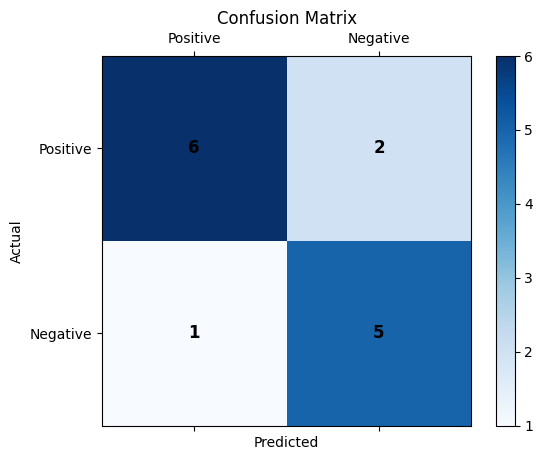

In [5]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(matrix):
    # Create the plot
    fig, ax = plt.subplots()
    
    # Display the matrix as a heatmap
    cax = ax.matshow(matrix, cmap="Blues")
    
    # Annotate each cell manually
    ax.text(0, 0, f"{matrix[0][0]}", ha='center', va='center', color='black', fontsize=12, fontweight='bold')  # TP
    ax.text(1, 0, f"{matrix[0][1]}", ha='center', va='center', color='black', fontsize=12, fontweight='bold')  # FN
    ax.text(0, 1, f"{matrix[1][0]}", ha='center', va='center', color='black', fontsize=12, fontweight='bold')  # FP
    ax.text(1, 1, f"{matrix[1][1]}", ha='center', va='center', color='black', fontsize=12, fontweight='bold')  # TN

    # Set axis labels and ticks
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Positive', 'Negative'])
    ax.set_yticklabels(['Positive', 'Negative'])
    
    # Add a color bar
    plt.colorbar(cax)

    # Display the plot
    plt.title('Confusion Matrix')
    plt.show()

# Test the function using the confusion matrix from Problem 1
confusion_matrix = [[6, 2], [1, 5]]
plot_confusion_matrix(confusion_matrix)
